In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")

results_2016 = pd.read_csv('./Runners_all_results_2016.csv', header = 0, encoding='latin-1')
results_2016['OfficialTime'] = results_2016['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2017 = pd.read_csv('./Runners_all_results_2017.csv', header = 0, encoding='latin-1')
results_2017['OfficialTime'] = results_2017['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2018 = pd.read_csv('./Runners_all_results_2018.csv', header = 0, encoding='latin-1')
results_2018['OfficialTime'] = results_2018['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)


b'Skipping line 26144: expected 20 fields, saw 21\n'


In [2]:
results_2016['Year']=2016
results_2017['Year']=2017
results_2018['Year']=2018
results_2019['Year']=2019
results = results_2019.append(results_2018, ignore_index = True, sort=True).append(results_2017, ignore_index = True, sort=True).append(results_2016, ignore_index = True, sort=True)

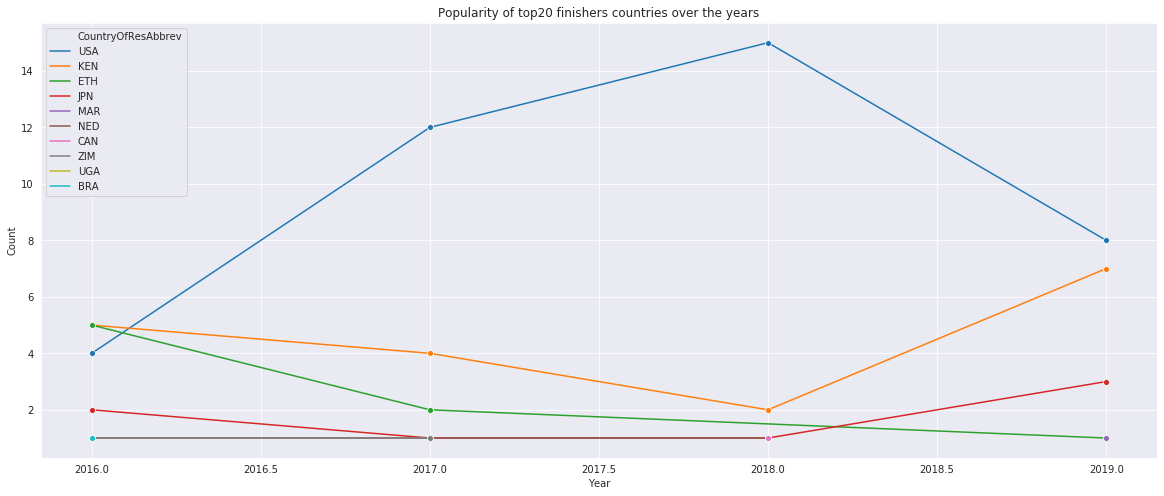

In [3]:
tx = 20
top = results_2019.head(tx).append(results_2018.head(tx), ignore_index = True, sort=True).append(results_2017.head(tx), ignore_index = True, sort=True).append(results_2016.head(tx), ignore_index = True, sort=True)
s = top.groupby(['Year', 'CountryOfResAbbrev'], as_index= False).count().sort_values(ascending=False, by='City')
g = sns.lineplot(x="Year", y="City", marker="o", hue='CountryOfResAbbrev', dashes=True, data=s)
g.set_title("Popularity of top20 finishers countries over the years")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

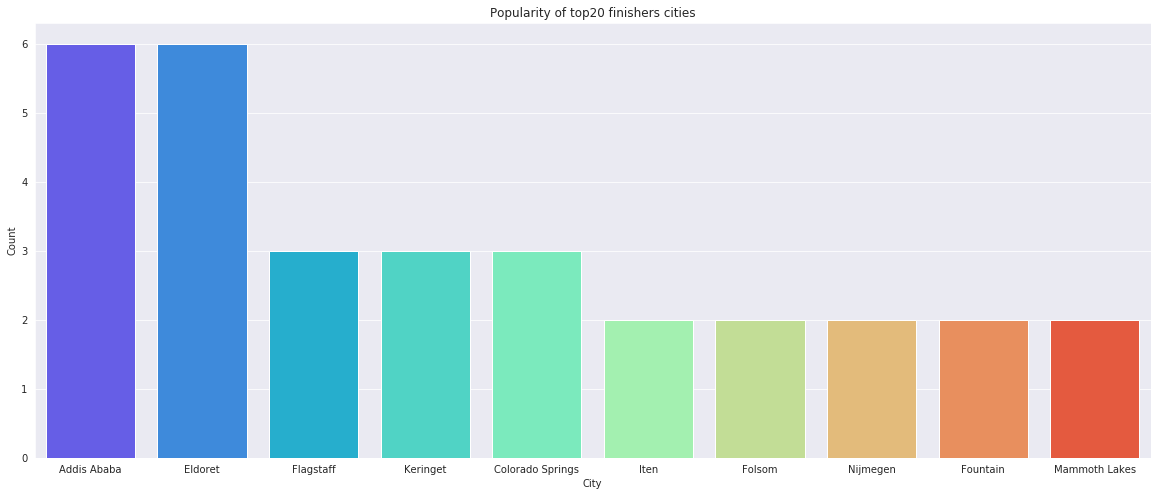

In [4]:
s = top.groupby(['City']).count()['CountryOfCtzAbbrev'].sort_values(ascending=False).head(10)
g = sns.barplot(s.index, s, palette='rainbow')
g.set_title("Popularity of top20 finishers cities")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

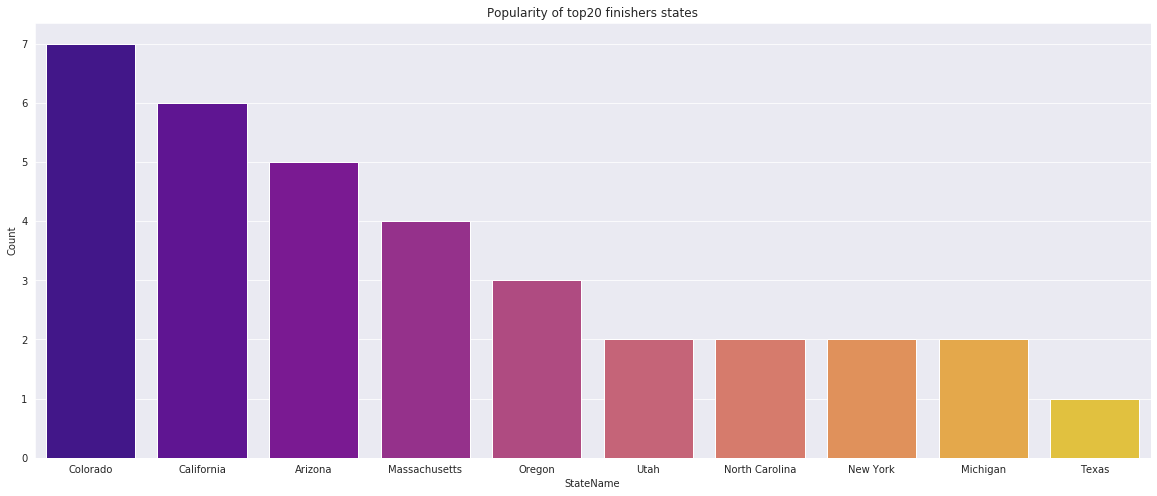

In [5]:
s = top.groupby(['StateName']).count()['City'].sort_values(ascending=False).head(10)
g = sns.barplot(s.index, s, palette='plasma')
g.set_title("Popularity of top20 finishers states")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

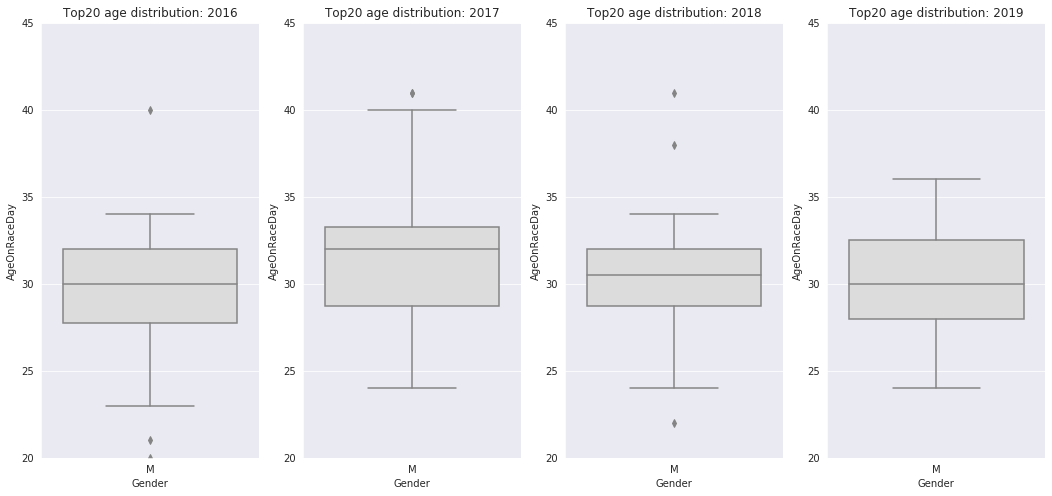

In [6]:
tx = 20
fig, ax =plt.subplots(1,4)
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2016.head(tx), ax=ax[0])
g.set_title("Top20 age distribution: 2016")
g.set_ylim(20,45);
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2017.head(tx), ax=ax[1])
g.set_title("Top20 age distribution: 2017")
g.set_ylim(20,45);
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2018.head(tx), ax=ax[2])
g.set_title("Top20 age distribution: 2018")
g.set_ylim(20,45);
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2019.head(tx), ax=ax[3])
g.set_title("Top20 age distribution: 2019")
g.set_ylim(20,45);
g.figure.set_size_inches(18,8)

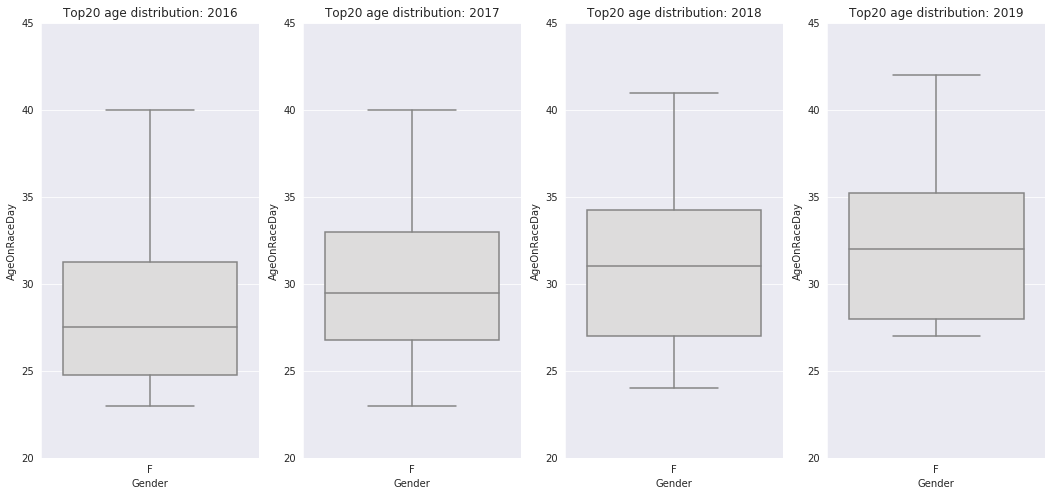

In [11]:
tx = 20
fig, ax =plt.subplots(1,4)
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2016[results_2016.Gender=='F'].head(tx), ax=ax[0])
g.set_title("Top20 age distribution: 2016")
g.set_ylim(20,45);
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2017[results_2017.Gender=='F'].head(tx), ax=ax[1])
g.set_title("Top20 age distribution: 2017")
g.set_ylim(20,45);
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2018[results_2018.Gender=='F'].head(tx), ax=ax[2])
g.set_title("Top20 age distribution: 2018")
g.set_ylim(20,45);
g = sns.boxplot(x='Gender', y='AgeOnRaceDay', palette="coolwarm", data=results_2019[results_2019.Gender=='F'].head(tx), ax=ax[3])
g.set_title("Top20 age distribution: 2019")
g.set_ylim(20,45);
g.figure.set_size_inches(18,8)

In [ ]:
fig, ax =plt.subplots(1,4)
g = sns.barplot(x='RankOverall', y='AgeOnRaceDay', palette="Wistia", data=results_2016.head(tx), ax=ax[0])
g.set_ylim(15,41);
g.set_title("Top finishers ages: 2016")
g = sns.barplot(x='RankOverall', y='AgeOnRaceDay', palette="Wistia", data=results_2017.head(tx), ax=ax[1])
g.set_ylim(15,41);
g.set_title("Top finishers ages: 2017")
g = sns.barplot(x='RankOverall', y='AgeOnRaceDay', palette="Wistia", data=results_2018.head(tx), ax=ax[2])
g.set_ylim(15,41);
g.set_title("Top finishers ages: 2018")
g = sns.barplot(x='RankOverall', y='AgeOnRaceDay', palette="Wistia", data=results_2019.head(tx), ax=ax[3])
g.set_ylim(15,41);
g.set_title("Top finishers ages: 2019")
g.figure.set_size_inches(20,8)

In [ ]:
fig, ax =plt.subplots(1,4)
g = sns.barplot(x='RankOverall', y=results_2016.head(tx)['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="summer", data=results_2016.head(tx), ax=ax[0])
g.set_ylim(2.1,2.5);
g.set_title("Top official times: 2016")
g = sns.barplot(x='RankOverall', y=results_2017.head(tx)['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="summer", data=results_2017.head(tx), ax=ax[1])
g.set_ylim(2.1,2.5);
g.set_title("Top official times: 2017")
g = sns.barplot(x='RankOverall', y=results_2018.head(tx)['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="summer", data=results_2018.head(tx), ax=ax[2])
g.set_ylim(2.1,2.5);
g.set_title("Top official times: 2018")
g = sns.barplot(x='RankOverall', y=results_2019.head(tx)['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="summer", data=results_2019.head(tx), ax=ax[3])
g.set_ylim(2.1,2.5);
g.set_title("Top official times: 2019")
g.figure.set_size_inches(20,8)